# Business Understanding

# Data Understanding

The data is sourced from [This GitHub Repository](https://github.com/learn-co-curriculum/dsc-project-template/tree/template-mvp/zippedData). You can clone this repository down, rename the "zippedData" folder to "Data". Place it in the root directory of this repo.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
import sqlite3
conn = sqlite3.connect("Data/im.db")

### DataFrame created from relevant imdb data:

In [3]:
imdb_df = pd.read_sql_query("""
                            SELECT 
                                mb.movie_id,
                                mb.primary_title, 
                                mb.genres, 
                                kf.person_id, 
                                p.primary_name,
                                p.primary_profession
                            FROM movie_basics mb
                            JOIN known_for kf
                                USING(movie_id)
                            JOIN persons p
                                USING(person_id)
                            ;
                         
                            """, conn)
imdb_df

,movie_id,primary_title,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...
791001,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272490,Angela Gurgel,"director,writer"
791002,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272491,Ana Célia de Oliveira,"producer,director,writer"
791003,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272748,Cristiano Freitas,"cinematographer,camera_department"
791004,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9275317,Fábio Ferraz,cinematographer


In [4]:
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
tmdb_movies = pd.read_csv("Data/tmdb.movies.csv")
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Movie budget data:

In [6]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [8]:
imdb_df = pd.read_sql_query("""
                            SELECT 
                                mb.movie_id,
                                mb.primary_title, 
                                mb.genres, 
                                kf.person_id, 
                                p.primary_name,
                                p.primary_profession
                            FROM movie_basics mb
                            JOIN known_for kf
                                USING(movie_id)
                            JOIN persons p
                                USING(person_id)
                            ;
                         
                            """, conn)
imdb_df

,movie_id,primary_title,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,"Action,Crime,Drama",nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,Drama,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,Drama,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,Drama,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...
791001,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272490,Angela Gurgel,"director,writer"
791002,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272491,Ana Célia de Oliveira,"producer,director,writer"
791003,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9272748,Cristiano Freitas,"cinematographer,camera_department"
791004,tt9916754,Chico Albuquerque - Revelações,Documentary,nm9275317,Fábio Ferraz,cinematographer


## Data Preparation

For data representing money, I removed the dollar signs and commas within the values and converted them into integers to be able to work with them later. 

In [9]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(int)

In [10]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [11]:
tn_movie_budgets.drop(columns=["domestic_gross"], inplace=True)

In [12]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


### Feature Engineering

I created a profit feature that represents the total worldwide gross value for a movie, minus its initial budget to see how profitable the movie was overall. Then, I dropped any unnecessary columns.

In [13]:
tn_movie_budgets['profit'] = tn_movie_budgets.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747


In [14]:
tn_movie_budgets.drop(columns=["worldwide_gross"], inplace=True)


In [15]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,profit
0,1,"Dec 18, 2009",Avatar,425000000,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,999721747


In [16]:
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie':'Movie_Title'})
tmdb_movies = tmdb_movies.rename(columns={'title':'Movie_Title'})
joined_frame = tn_movie_budgets.merge(tmdb_movies, on='Movie_Title', how='inner')


joined_frame

,id_x,release_date_x,Movie_Title,production_budget,profit,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,355945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000,464792,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,51,"Apr 21, 2015",Ten,25000,-25000,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000,-22000,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000,-20000,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [17]:
joined_frame.describe()
# The median profit is ~13844130

,id_x,production_budget,profit,Unnamed: 0,id_y,popularity,vote_average,vote_count
count,2385.000000,2.385000e+03,2.385000e+03,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000
mean,50.990776,3.772410e+07,8.217985e+07,11491.000000,212160.239413,10.423104,6.202474,1662.224738
std,28.500793,5.125635e+07,1.832859e+08,7549.622509,144783.690432,8.257018,1.184930,2681.183078
min,1.000000,9.000000e+03,-1.104502e+08,1.000000,62.000000,0.600000,0.000000,1.000000
25%,27.000000,5.000000e+06,-1.800000e+06,5215.000000,72431.000000,4.749000,5.600000,48.000000
50%,51.000000,1.900000e+07,1.384413e+07,11177.000000,209702.000000,9.329000,6.300000,563.000000
75%,76.000000,4.500000e+07,7.755159e+07,17551.000000,332979.000000,14.239000,6.900000,2047.000000
max,100.000000,4.250000e+08,2.351345e+09,26508.000000,587627.000000,80.773000,10.000000,22186.000000


In [18]:
above_avg_profits = joined_frame[joined_frame['profit'] > 13844130] 
above_avg_profits

,id_x,release_date_x,Movie_Title,production_budget,profit,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,2351345279,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,635063875,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1072413963,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,1748134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,355945209,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,38,"Jul 12, 2013",Fruitvale Station,900000,16649645,8033,[18],157354,en,Fruitvale Station,9.587,2013-07-26,7.4,645
2252,30,"Nov 15, 1974",Benji,500000,31059560,6833,[99],180705,en,Benji,0.716,2012-10-23,8.0,4
2253,30,"Nov 15, 1974",Benji,500000,31059560,24138,"[10751, 80, 18]",495193,en,Benji,10.503,2018-03-02,7.0,138
2298,69,"May 1, 1981",Graduation Day,250000,23644000,17086,[],450254,en,Graduation Day,0.600,2015-01-01,5.0,1


In [19]:
Action = above_avg_profits[above_avg_profits['genre_ids'].str.contains("28", na = False)]

Adventure = above_avg_profits[above_avg_profits['genre_ids'].str.contains("12", na = False)]

Animation = above_avg_profits[above_avg_profits['genre_ids'].str.contains("16", na = False)]

Comedy = above_avg_profits[above_avg_profits['genre_ids'].str.contains("35", na = False)]

Crime = above_avg_profits[above_avg_profits['genre_ids'].str.contains("80", na = False)]

Documentary = above_avg_profits[above_avg_profits['genre_ids'].str.contains("99", na = False)]

Drama = above_avg_profits[above_avg_profits['genre_ids'].str.contains("18", na = False)]

Family = above_avg_profits[above_avg_profits['genre_ids'].str.contains("10751", na = False)]

Fantasy = above_avg_profits[above_avg_profits['genre_ids'].str.contains("14", na = False)]

History = above_avg_profits[above_avg_profits['genre_ids'].str.contains("36", na = False)]

Horror = above_avg_profits[above_avg_profits['genre_ids'].str.contains("27", na = False)]

Music = above_avg_profits[above_avg_profits['genre_ids'].str.contains("10402", na = False)]

Mystery = above_avg_profits[above_avg_profits['genre_ids'].str.contains("9648", na = False)]

Romance = above_avg_profits[above_avg_profits['genre_ids'].str.contains("10749", na = False)]

ScienceFiction = above_avg_profits[above_avg_profits['genre_ids'].str.contains("878", na = False)]

TVMovie = above_avg_profits[above_avg_profits['genre_ids'].str.contains("10770", na = False)]

Thriller = above_avg_profits[above_avg_profits['genre_ids'].str.contains("53", na = False)]

War = above_avg_profits[above_avg_profits['genre_ids'].str.contains("10752", na = False)]

Western = above_avg_profits[above_avg_profits['genre_ids'].str.contains("37", na = False)]


In [20]:
print("Action Movies:", Action.shape[0])
print("Adventure Movies:", Adventure.shape[0])
print("Animation Movies:", Animation.shape[0])
print("Comedy Movies:", Comedy.shape[0])
print("Crime Movies:", Crime.shape[0])
print("Documentary Movies:", Documentary.shape[0])
print("Drama Movies:", Drama.shape[0])
print("Family Movies:", Family.shape[0])
print("Fantasy Movies:", Fantasy.shape[0])
print("History Movies:", History.shape[0])
print("Horror Movies:", Horror.shape[0])
print("Music Movies:", Music.shape[0])
print("Mystery Movies:", Mystery.shape[0])
print("Romance Movies:", Romance.shape[0])
print("Science Fiction Movies:", ScienceFiction.shape[0])
print("TV Movies:", TVMovie.shape[0])
print("Thriller Movies:", Thriller.shape[0])
print("War Movies:", War.shape[0])
print("Western Movies:", Western.shape[0])

Action Movies: 344
Adventure Movies: 277
Animation Movies: 117
Comedy Movies: 373
Crime Movies: 130
Documentary Movies: 20
Drama Movies: 472
Family Movies: 178
Fantasy Movies: 167
History Movies: 42
Horror Movies: 157
Music Movies: 27
Mystery Movies: 89
Romance Movies: 141
Science Fiction Movies: 171
TV Movies: 2
Thriller Movies: 302
War Movies: 30
Western Movies: 10


In [22]:
"""Future research: compare the numbers of movie genres in high-profit movies to how many were in the movies data in general. This would show if certain genres are just more rare in general vs. whether they do not profit as much.
"""

'Future research: compare the numbers of movie genres in high-profit movies to how many were in the movies data in general. This would show if certain genres are just more rare in general vs. whether they do not profit as much.\n'

In [23]:
imdb_known_by = pd.DataFrame([imdb_df.primary_title, imdb_df.primary_name, imdb_df.primary_profession]).transpose()
imdb_known_by

,primary_title,primary_name,primary_profession
0,Sunghursh,Mahasweta Devi,writer
1,Sunghursh,Anjana Rawail,"writer,costume_designer"
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
3,The Other Side of the Wind,Oja Kodar,"actress,writer,director"
4,The Other Side of the Wind,Leslie Moonves,"actor,executive,producer"
...,...,...,...
791001,Chico Albuquerque - Revelações,Angela Gurgel,"director,writer"
791002,Chico Albuquerque - Revelações,Ana Célia de Oliveira,"producer,director,writer"
791003,Chico Albuquerque - Revelações,Cristiano Freitas,"cinematographer,camera_department"
791004,Chico Albuquerque - Revelações,Fábio Ferraz,cinematographer


In [24]:
imdb_known_by.rename(columns={'primary_title' : 'Movie_Title'}, inplace=True)
imdb_known_by.rename(columns={'primary_name' : 'Person_Known_For'}, inplace=True)
imdb_known_by = imdb_known_by.drop_duplicates(subset = ['Movie_Title'])
imdb_known_by

,Movie_Title,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
15,Sabse Bada Sukh,Kumud Damle,actress
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
...,...,...,...
790988,Kuambil Lagi Hatiku,Keinaya Meissi Gusti,None
790989,Rodolpho Teóphilo - O Legado de um Pioneiro,Janaína Gouveia,"writer,editor,producer"
790996,Dankyavar Danka,Suvarna Kale,actress
790997,6 Gunn,Pranav Raorane,actor


In [25]:
knownfor_actor = imdb_known_by[imdb_known_by['primary_profession'].str.contains("actor", "actress", na = False)]
knownfor_actor

,Movie_Title,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
25,Joe Finds Grace,C. Ernst Harth,"actor,producer,soundtrack"
43,So Much for Justice!,Mirko Roggenbock,actor
...,...,...,...
790960,The Holden Family Plan,Joshua Bootz,actor
790967,Wien is 't Hof van Commerce,Flip Kowlier,"composer,actor,soundtrack"
790985,Safeguard,Jens Kristjan,actor
790987,The Secret of China,Wang Peng Kai,actor


In [26]:
knownfor_writer = imdb_known_by[imdb_known_by['primary_profession'].str.contains("writer", na = False)]
knownfor_writer

,Movie_Title,Person_Known_For,primary_profession
0,Sunghursh,Mahasweta Devi,writer
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
22,A Thin Life,Frank Howson,"actor,writer,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790940,De Beentjes van Sint Hildegard,Herman Finkers,"actor,writer,composer"
790957,Sokagin Çocuklari,Kasim Uçkan,writer
790980,Vida em Movimento,Selma Perez,"writer,editor"
790983,The Last White Witch,Ryuho Okawa,"writer,producer,executive"


In [27]:
knownfor_director = imdb_known_by[imdb_known_by['primary_profession'].str.contains("director", na = False)]
knownfor_director

,Movie_Title,Person_Known_For,primary_profession
2,The Other Side of the Wind,Peter Bogdanovich,"actor,director,writer"
17,The Wandering Soap Opera,Raoul Ruiz,"director,writer,producer"
24,Bigfoot,Mc Jones,"actor,director"
29,O Silêncio,José Manuel Alves Pereira,"editor,director,producer"
49,Children of the Green Dragon,Bence Miklauzic,"director,writer,assistant_director"
...,...,...,...
790913,Ximei,Gaylen Ross,"director,producer,writer"
790916,Razreshite tebya potselovat... Otets nevesty,Yuriy Morozov,"director,actor,writer"
790922,Hellbiro,Evann Rodriguez,"director,actor,writer"
790946,Swarm Season,Sarah Christman,"miscellaneous,director,editor"


# Exploratory Data Analysis

- figure out how to add value counts of 3 genre columns together
- graph different genres vs profit
- get average budget, compare the budgets of highest profiting movies to that average
        - mean budget = ~43197190, median profit = ~10376510
- filter primary profession for only those containing actor, actress, writer, and director. Get counts for most common profession known for.
    - knownfor actor/actress: 35023; writer: 40991; director: 52977
    - total: 125,670
    - "Of the 125,670 movies in the imdb data, 35023 were known for an actor/actress, 40991 were known for a writer, and 52977 were known for a director"


In [28]:
knownby_df = pd.DataFrame({"Movies Known For":[35023, 40991, 52977]}, 
                  index = ["Actor/Actress", "Writer", "Director"])

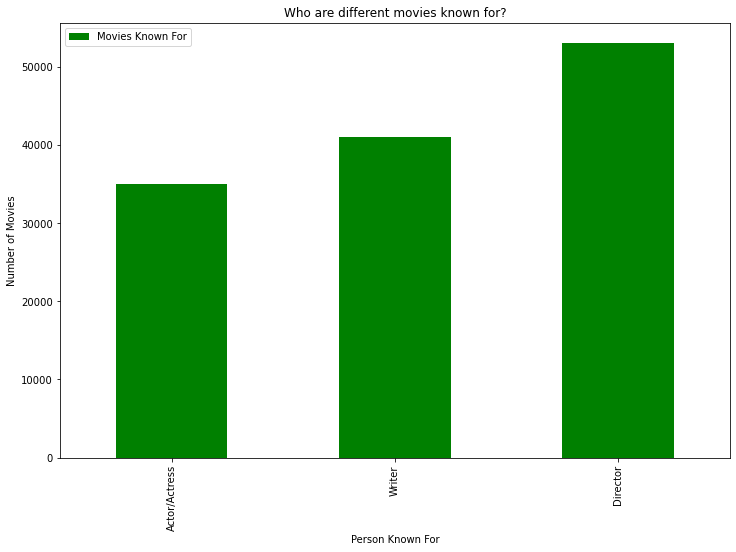

In [35]:
plot1 = knownby_df.plot(kind="bar", title="Who are different movies known for?", ylabel="Number of Movies", xlabel="Person Known For", figsize=(12,8), color="green")


Text(0, 0.5, 'Movie Profit')

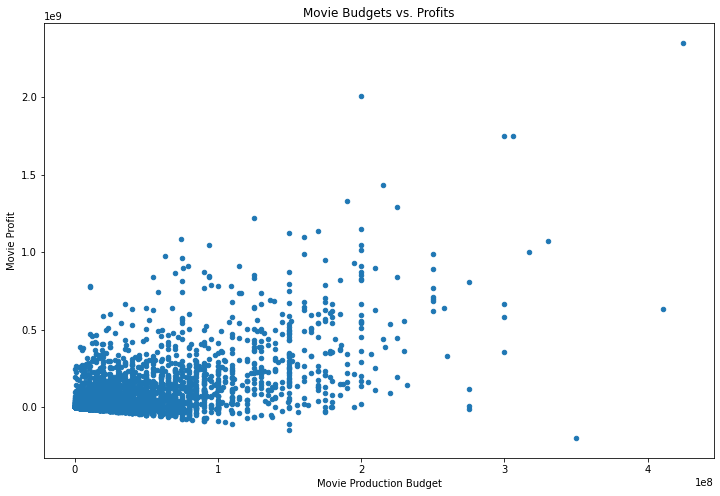

In [33]:
tn_movie_budgets.plot(
    'production_budget', 'profit', 
    kind='scatter', 
    figsize=(12,8), 
    title="Movie Budgets vs. Profits" 
    )
plt.xlabel("Movie Production Budget")
plt.ylabel("Movie Profit")



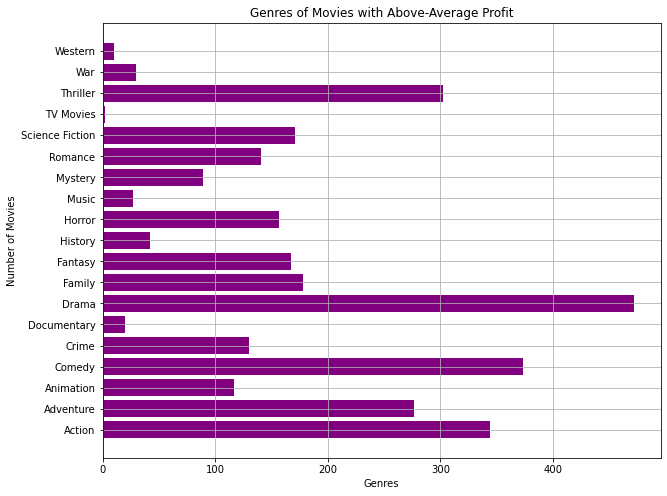

In [34]:
import matplotlib.pyplot as plt

x_axis = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movies', 'Thriller', 'War', 'Western']
y_axis = [344, 277, 117, 373, 130, 20, 472, 178, 167, 42, 157, 27, 89, 141, 171, 2, 302, 30, 10]


f, ax = plt.subplots(figsize=(10,8))
plt.barh(x_axis, y_axis, color="purple")
plt.title('Genres of Movies with Above-Average Profit')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# Conclusions

## Limitations

## Recommendations

## Next Steps